<a href="https://colab.research.google.com/github/kdovin/project_Lovely-G.4_none/blob/main/%EB%8F%84%EB%B9%88_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random, warnings
warnings.filterwarnings("ignore")

In [ ]:
#데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이터/주택가격/train.csv') #모델 학습 파일
test = pd.read_csv('/content/drive/MyDrive/데이터/주택가격/test.csv') #모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/데이터/주택가격/sample_submission.csv') #답안지 파일

# < 데이터 확인 >

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
train.info()
#81개 변수, 1460개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()
#80개 변수, 1458개 / test엔 SalePrice(목표변수)가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# 결측값 확인 (train)
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

< 데이터 목록 >

- SalePrice - 부동산 판매 가격(달러) (예측하려는 목표 변수)
- MSSubClass : 건물 클래스
- MSZoning : 일반적인 구역 분류
- LotFrontage : 부동산과 연결된 거리의 선형 피트
- LotArea : 부지 크기(평방피트)
- Street : 도로 접근 유형
- Alley : 골목 접근 방식
- LotShape : 부동산의 일반적인 형태
- LandContour : 대지의 평탄도
- Utilities : 사용 가능한 유틸리티 종류
- LotConfig : 로트 구성
- LandSlope : 토지의 경사
- Neighborhood : Ames 시 경계 내의 물리적 위치
- Condition1 : 주요 도로 또는 철도에 근접함
- Condition2 : 주요 도로 또는 철도에 근접함(두 번째가 있는 경우)
- BldgType : 주거 유형
- HouseStyle : 주거 스타일
- OverallQual : 전체적인 재질 및 마감 품질
- GeneralCond : 전반적인 상태 등급
- YearBuilt : 원래 건설 날짜
- YearRemodAdd : 리모델링 날짜
- RoofStyle : 지붕 유형
- RoofMatl : 지붕재
- Exterior1st : 주택 외부 피복재
- Exterior2nd : 집의 외부 덮개(재료가 두 개 이상인 경우)
- MasVnrType : 조적 베니어 유형
- MasVnrArea : 석조 베니어 면적(평방 피트)
- ExterQual : 외장재 품질
- ExterCond : 외부 재질의 현재 상태
- Foundation : 기초의 종류
- BsmtQual : 지하실 높이
- BsmtCond : 지하실의 일반상태
- BsmtExposure : 산책 또는 정원 수준 지하 벽
- BsmtFinType1 : 지하 마감면적의 품질
- BsmtFinSF1 : 유형 1 마감 평방피트
- BsmtFinType2 : 두 번째 완성된 영역의 품질(있는 경우)
- BsmtFinSF2 : 유형 2 마감 평방피트
- BsmtUnfSF : 지하실의 미완성 평방피트
- TotalBsmtSF : 지하 면적의 총 평방피트
- Heating : 난방방식
- HeatingQC : 가열 품질 및 상태
- CentralAir : 중앙 에어컨
- Electrical : 전기 시스템
- 1stFlrSF : 1층 평방 피트
- 2ndFlrSF : 2층 평방 피트
- LowQualFinSF : 낮은 품질로 마감된 평방 피트(모든 층)
- GrLivArea : 지상(지상) 생활 면적 평방 피트
- BsmtFullBath : 지하 욕실
- BsmtHalfBath : 지하 반욕실
- FullBath : 1층 이상 욕실 완비
- HalfBath : 지상층 이상의 반욕실
- BedroomAbvGr : 지하층 이상 침실 수
- KitchenAbvGr : 주방 개수
- KitchenQual : 주방 품질
- TotRmsAbvGrd : 1층 위의 총 객실 수(욕실은 포함되지 않음)
- Functional : 홈 기능성 평가
- Fireplaces : 벽난로 수
- FireplaceQu : 벽난로 품질
- GarageType : 차고 위치
- GarageYrBlt : 차고가 건설된 연도
- GarageFinish : 차고 내부 마감
- GarageCars : 차량 수용 차고의 크기
- GarageArea : 차고의 크기(평방피트)
- GarageQual : 차고 품질
- GarageCond : 차고 상태
- PavedDrive : 포장된 진입로
- WoodDeckSF : 목재 데크 면적(평방 피트)
- OpenPorchSF : 개방형 현관 면적(제곱피트)
- EnclosedPorch : 닫힌 현관 면적(평방피트)
- 3SsnPorch : 3계절 현관 면적(제곱피트)
- ScreenPorch : 스크린 현관 면적(평방피트)
- PoolArea : 평방 피트 단위의 수영장 면적
- PoolQC : 수영장 품질
- Fence : 울타리 품질
- MiscFeature : 다른 카테고리에서 다루지 않는 기타 기능
- MiscVal : 기타 기능의 $Value
- MoSold : 판매월
- YrSold : 판매된 연도
- SaleType : 판매 유형
- SaleCondition : 판매 조건

# < 1차 데이터 정리 >

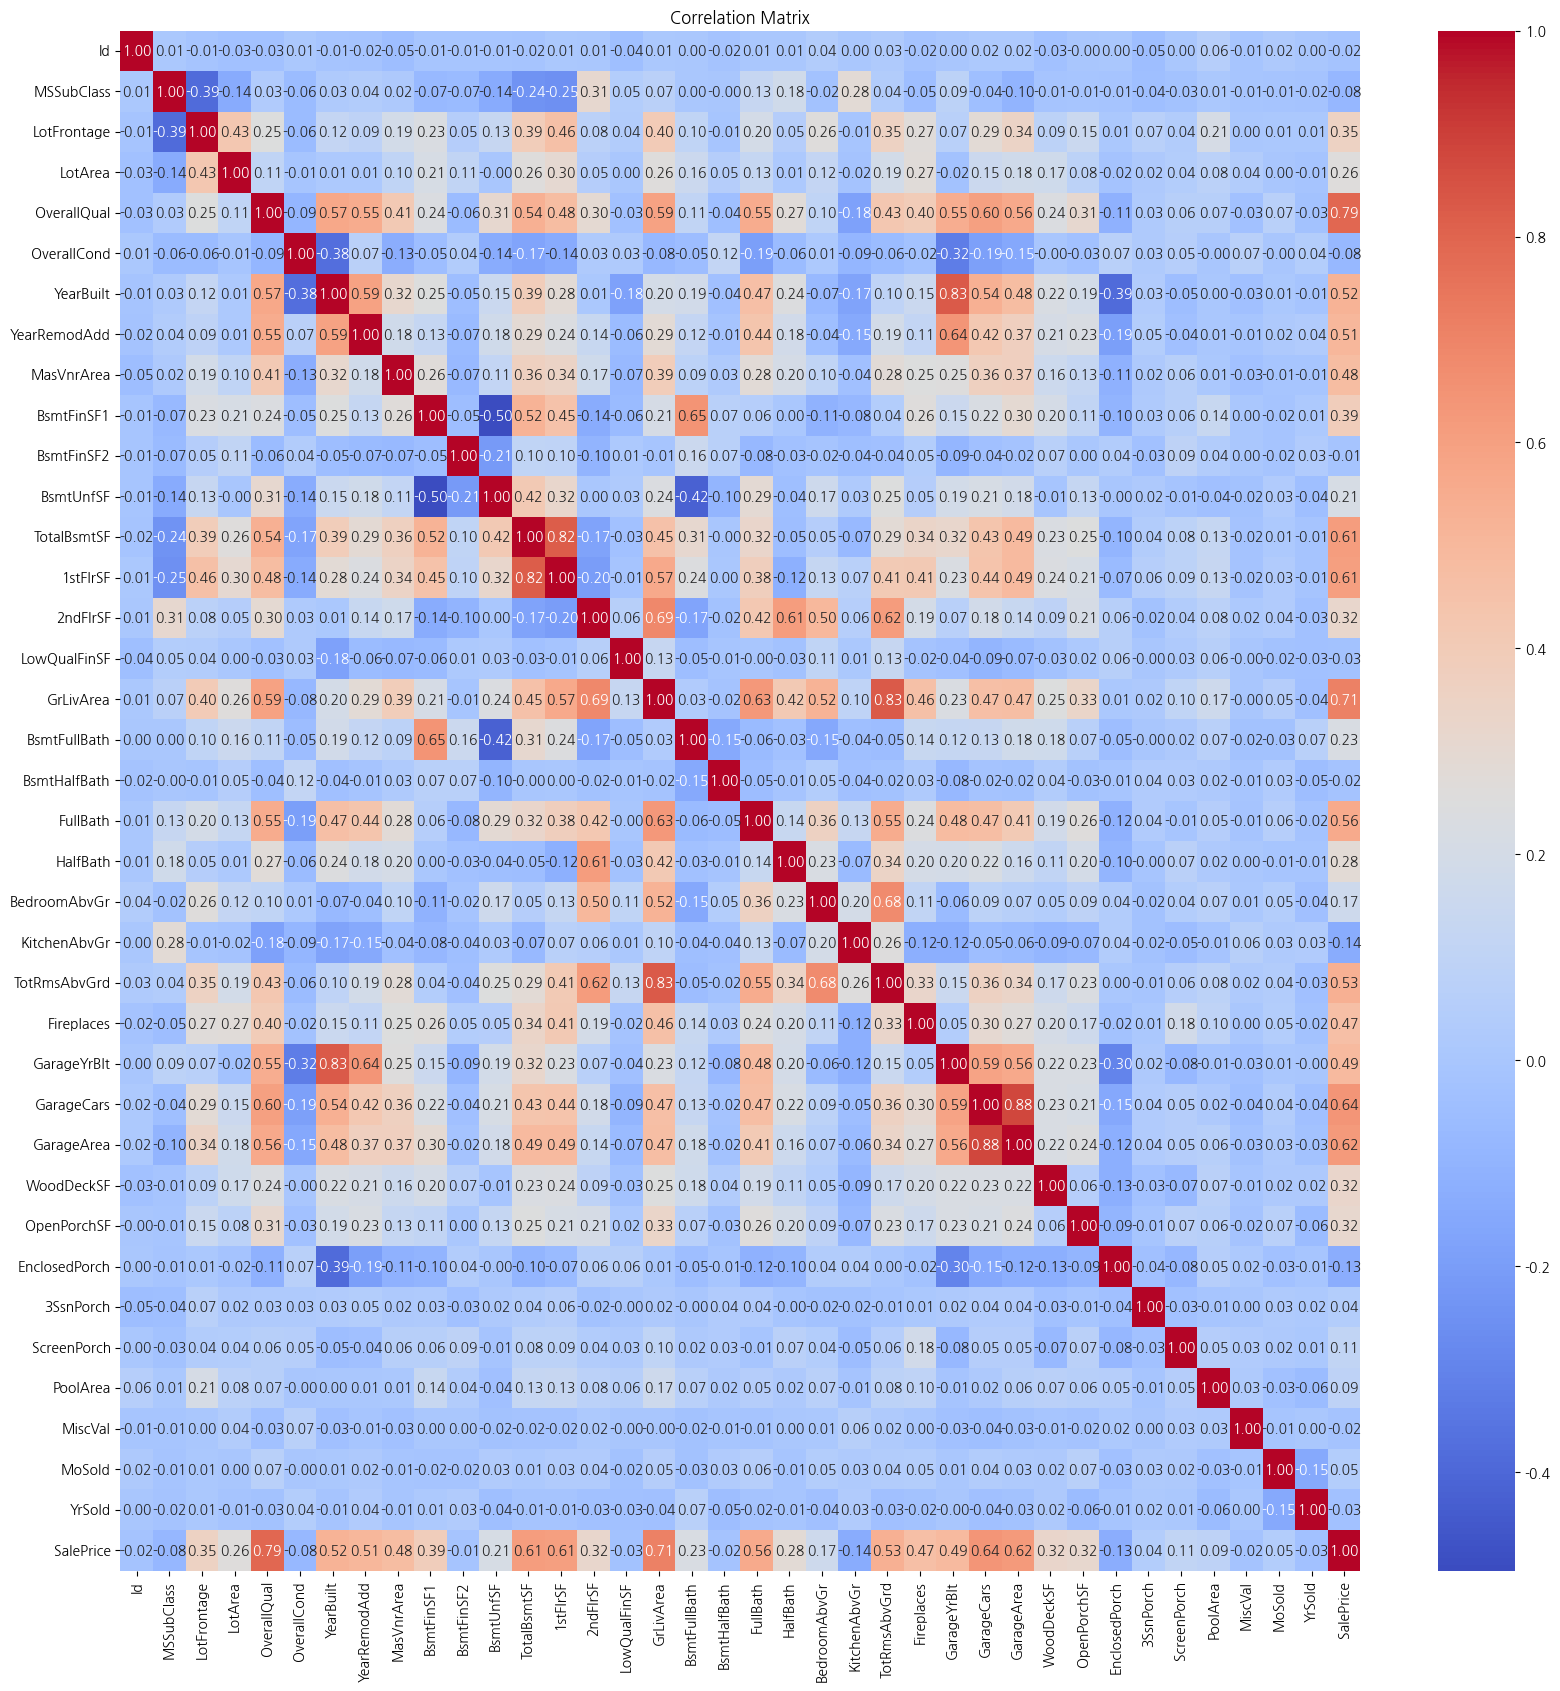

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- 절대값이 0.8 이상: 매우 강한 선형 상관관계
- 절대값이 0.6에서 0.8: 강한 선형 상관관계
- 절대값이 0.4에서 0.6: 중간 정도의 선형 상관관계
- 절대값이 0.2에서 0.4: 약한 선형 상관관계
- 절대값이 0.2 미만: 거의 무시될 수 있는 상관관계

< 목표변수인 SalePrice와의 상관관계가 0.5에서 0.8로 강한 선형 상관관계를 가지는 변수들>
 - OverallQual : 전체적인 재질 및 마감 품질
 - YearBuilt : 원래 건설 날짜
 - YearRemodAdd : 리모델링 날짜
 - TotalBsmtSF : 지하 면적의 총 평방피트
 - 1stFlrSF : 1층 평방 피트
 - GrLivArea : 지상(지상) 생활 면적 평방 피트
 - FullBath : 1층 이상 욕실 완비
 - TotRmsAbvGrd : 1층 위의 총 객실 수(욕실은 포함되지 않음)
 - GarageCars : 차량 수용 차고의 크기
 - GarageArea : 차고의 크기(평방피트)

 <목표변수인 SalePrice와의 상관관계가 0.3 미만의 선형 상관관계를 가지는 변수들>
- MSSubClass : 건물 클래스
- LotArea : 부지 크기(평방피트)
- OverallCond : 전체적인 재질 및 마감 품질
- BsmtFinSF2 : 유형 2 마감 평방피트
- BsmtUnfSF : 지하실의 미완성 평방피트
- LowQualFinSF : 낮은 품질로 마감된 평방 피트(모든 층)
- BsmtFullBath : 지하 반욕실
- HalfBath : 지상층 이상의 반욕실
- BedroomAbvGr : 지하층 이상 침실 수
- KitchenAbvGr : 주방 개수
- EnclosedPorch : 닫힌 현관 면적(평방피트)
- 3SsnPorch : 3계절 현관 면적(제곱피트)
- ScreenPorch : 스크린 현관 면적(평방피트)
- PoolArea : 평방 피트 단위의 수영장 면적
- MiscVal : 기타 기능의 $Value
- MoSold : 판매월
- YrSold : 판매된 연도

In [ ]:
# 0.3미만 상관계수 변수 드롭
train.drop(columns=['MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], inplace=True)
test.drop(columns=['MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], inplace=True)

# 그 외 드롭(목표변수와 관련없는 변수이면서 결측값이 많은(1000개 이상) 변수)
train.drop(columns=['MiscFeature','PoolQC','Alley','Fence'], inplace=True)
test.drop(columns=['MiscFeature','PoolQC','Alley','Fence'], inplace=True)

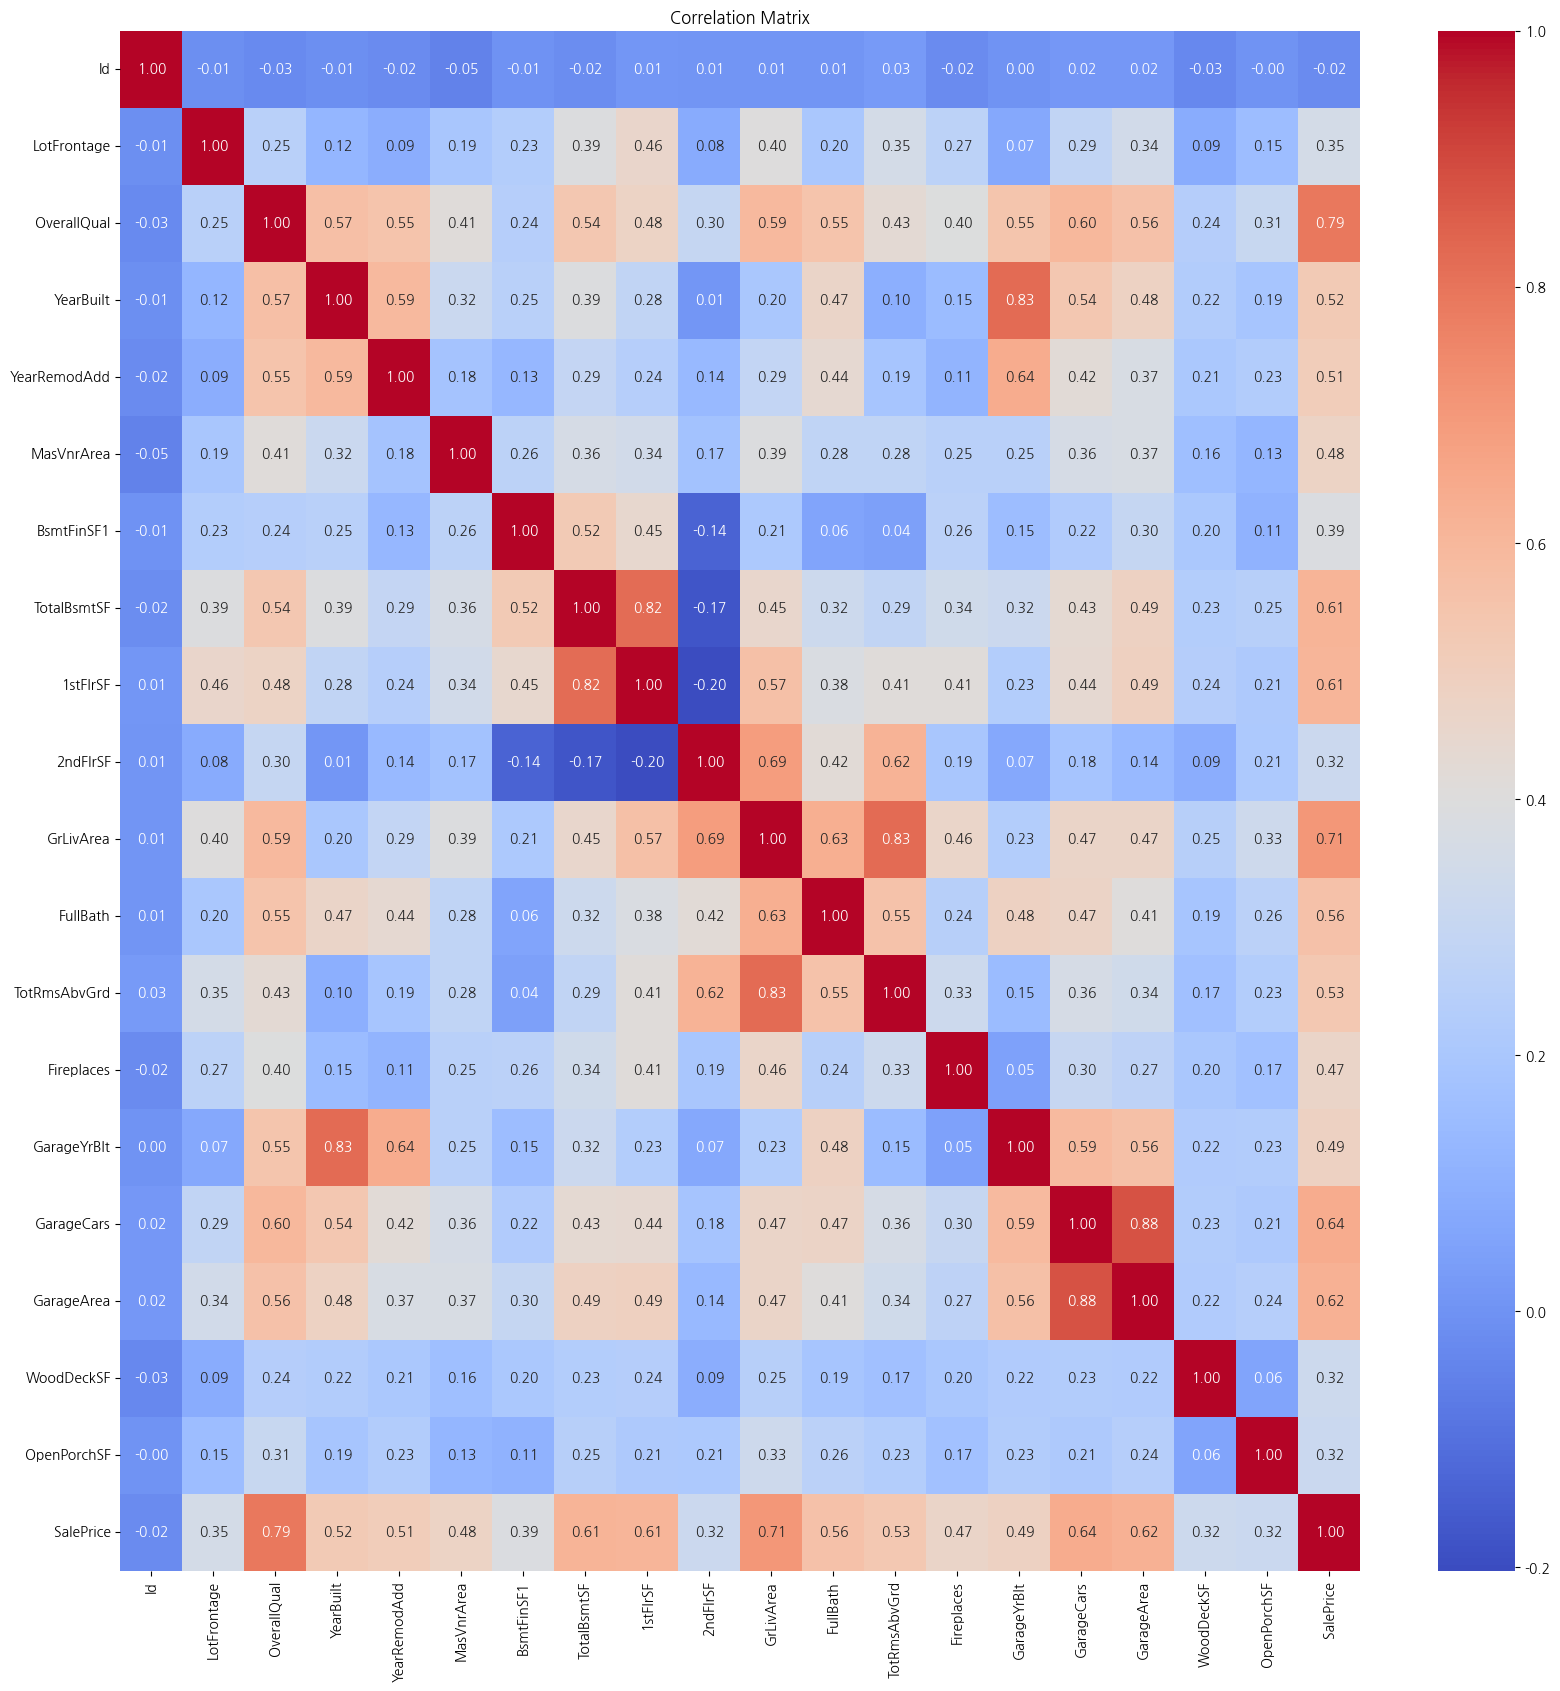

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# < 1차 정리된 변수들 확인 >

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Utilities      1457 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [ ]:
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [ ]:
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
TotalBsmtSF       1
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [ ]:
# train에서 결측값이 있는 열의 리스트와 각 리스트의 형식 확인
missing_columns = train.columns[train.isna().any()].tolist()
column_types = train[missing_columns].dtypes

print("결측값이 있는 열의 리스트:", missing_columns)
print("각 리스트의 형식:")
print(column_types)

결측값이 있는 열의 리스트: ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
각 리스트의 형식:
LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object


In [ ]:
# test에서 결측값이 있는 열의 리스트와 각 리스트의 형식 확인
missing_columns = test.columns[test.isna().any()].tolist()
column_types = test[missing_columns].dtypes

print("결측값이 있는 열의 리스트:", missing_columns)
print("각 리스트의 형식:")
print(column_types)

결측값이 있는 열의 리스트: ['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']
각 리스트의 형식:
MSZoning         object
LotFrontage     float64
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
TotalBsmtSF     float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
SaleType         object
dtype: object


# **`< 2차 숫자형 데이터 처리 >`**

최빈값(Mode):

- 범주형 데이터의 결측값을 채울 때 주로 사용됩니다.
- 해당 열이 범주형 데이터이고, 그 분포가 특정 값으로 치우쳐져 있을 때 유용합니다.

평균(Mean):
- 연속형 데이터의 결측값을 채울 때 주로 사용됩니다.
- 해당 열이 연속형 데이터이고, 결측값이 존재하는 데이터의 분포가 정규분포에 가깝다고 가정할 때 유용합니다.
-  정규분포를 따르지 않을 경우 평균값이 대표성을 잃을 수 있습니다.
- 이상치(outlier)가 존재할 경우, 평균값이 이상치에 민감하게 반응할 수 있습니다.

In [ ]:
# 남은 변수 중 숫자형인 변수의 상관관계 확인
correlation1 = train['SalePrice'].corr(train['LotFrontage'])
correlation2 = train['SalePrice'].corr(train['MasVnrArea'])
correlation3 = train['SalePrice'].corr(train['GarageYrBlt'])
correlation4 = train['SalePrice'].corr(train['BsmtFinSF1'])
correlation5 = train['SalePrice'].corr(train['TotalBsmtSF'])
correlation6 = train['SalePrice'].corr(train['GarageCars'])
correlation7 = train['SalePrice'].corr(train['GarageArea'])

print(correlation1,correlation2,correlation3,correlation4,correlation5,correlation6,correlation7)

0.3517990965706781 0.4774930470957163 0.4863616774878609 0.3864198062421532 0.6135805515591956 0.6404091972583529 0.6234314389183618


1. LotFrontage(부동산과 연결된 거리의 선형 피트) / 259개, 227개

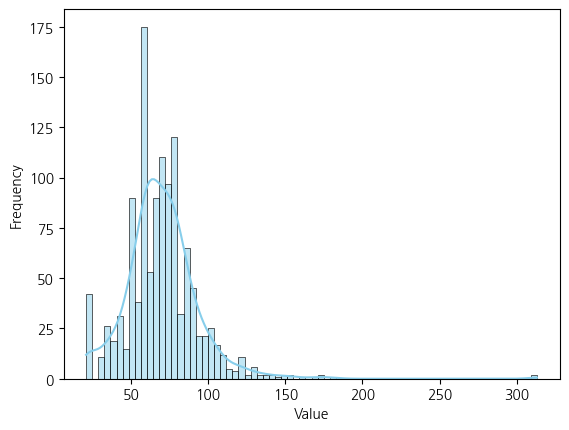

In [ ]:
# 히스토그램 시각화
sns.histplot(data=train, x='LotFrontage', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

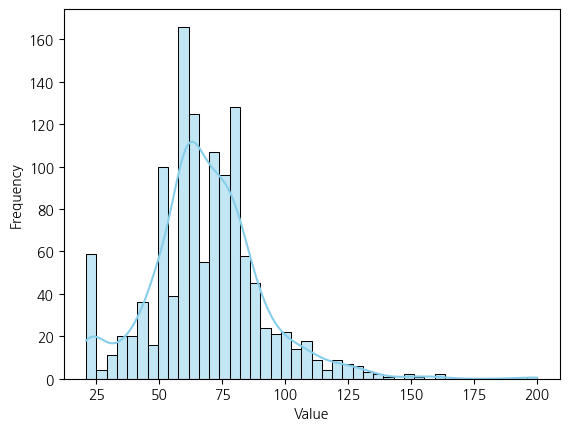

In [ ]:
# 히스토그램 시각화
sns.histplot(data=test, x='LotFrontage', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

In [ ]:
#평균 확인
mean_value1 = train['LotFrontage'].mean()
print("train에서 평균값:", mean_value1)

mean_value2 = test['LotFrontage'].mean()
print("test에서 평균값:", mean_value2)

train에서 평균값: 70.04995836802665
test에서 평균값: 68.58035714285714


In [ ]:
#평균으로 결측값 처리
train['LotFrontage'].fillna(70, inplace=True)
test['LotFrontage'].fillna(68, inplace=True)

2. MasVnrArea(석조 베니어 면적(평방 피트))/8개,15개


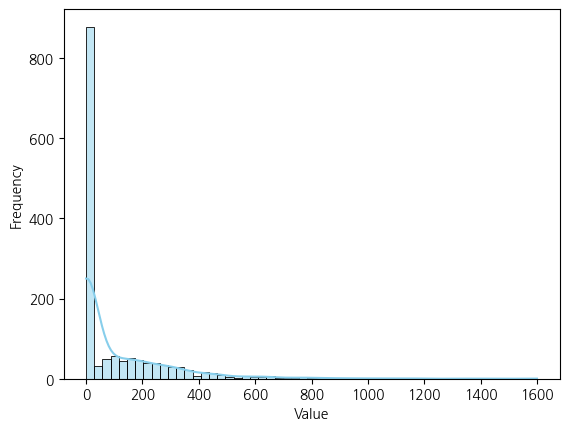

In [ ]:
# 히스토그램 시각화
sns.histplot(data=train, x='MasVnrArea', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

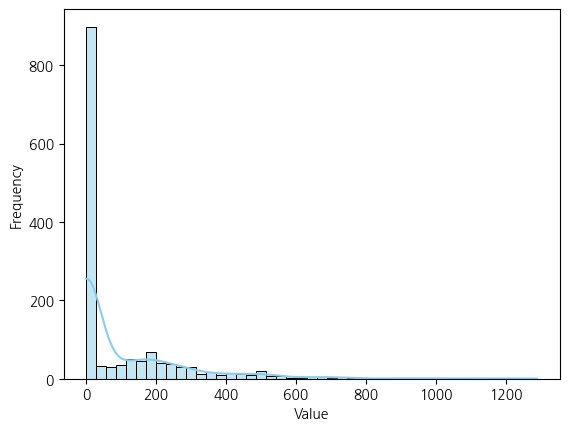

In [ ]:
# 히스토그램 시각화
sns.histplot(data=test, x='MasVnrArea', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

In [ ]:
#최빈값 확인
value1 = train['MasVnrArea'].mode()[0]
print("train에서 최빈값:", value1)

value2 = test['MasVnrArea'].mode()[0]
print("test에서 최빈값:", value2)

train에서 최빈값: 0.0
test에서 최빈값: 0.0


In [ ]:
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

3. GarageYrBlt(차고가 건설된 연도)/81개,78개


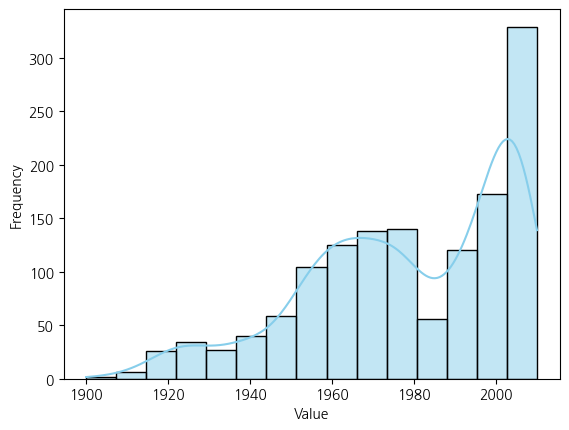

In [ ]:
# 히스토그램 시각화
sns.histplot(data=train, x='GarageYrBlt', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

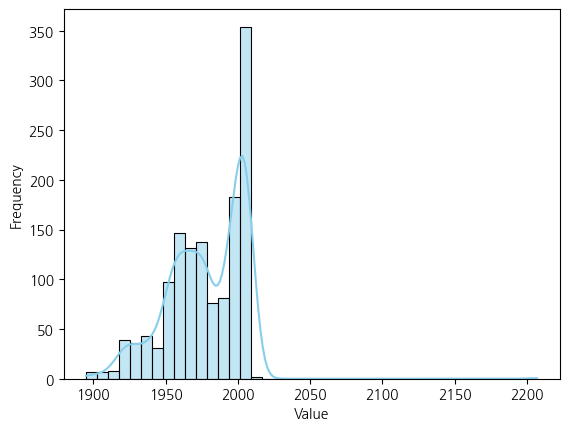

In [ ]:
# 히스토그램 시각화
sns.histplot(data=test, x='GarageYrBlt', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

In [ ]:
#최빈값 확인
value1 = train['GarageYrBlt'].mode()[0]
print("train에서 최빈값:", value1)

value2 = test['GarageYrBlt'].mode()[0]
print("test에서 최빈값:", value2)

train에서 최빈값: 2005.0
test에서 최빈값: 2005.0


In [ ]:
#최빈값으로 결측값 처리
train['GarageYrBlt'].fillna(2005, inplace=True)
test['GarageYrBlt'].fillna(2005, inplace=True)

4. BsmtFinSF1(유형 1 마감 평방피트)/1개(test)


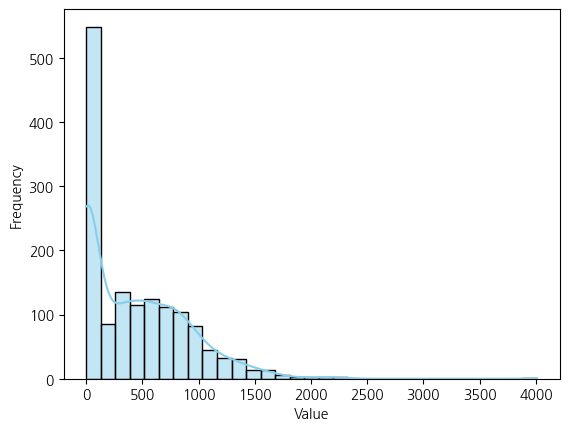

In [ ]:
# 히스토그램 시각화
sns.histplot(data=test, x='BsmtFinSF1', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

In [ ]:
#최빈값 확인
value=test['BsmtFinSF1'].mode()[0]
print("test에서 최빈값:", value)

test에서 최빈값: 0.0


In [ ]:
#최빈값으로 결측값 처리
test['BsmtFinSF1'].fillna(0, inplace=True)

5. TotalBsmtSF(지하 면적의 총 평방피트)/1개(test)


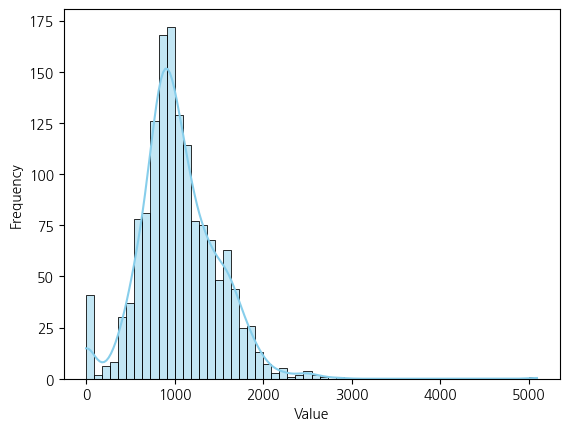

In [ ]:
# 히스토그램 시각화
sns.histplot(data=test, x='TotalBsmtSF', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

In [ ]:
#평균값 확인
mean_value = test['TotalBsmtSF'].mean()
print("test에서 평균값:", mean_value)

test에서 평균값: 1046.1179698216736


In [ ]:
#평균값으로 결측값 처리
test['TotalBsmtSF'].fillna(1046, inplace=True)

6. GarageCars(차량 수용 차고의 크기) / 1개 (test)

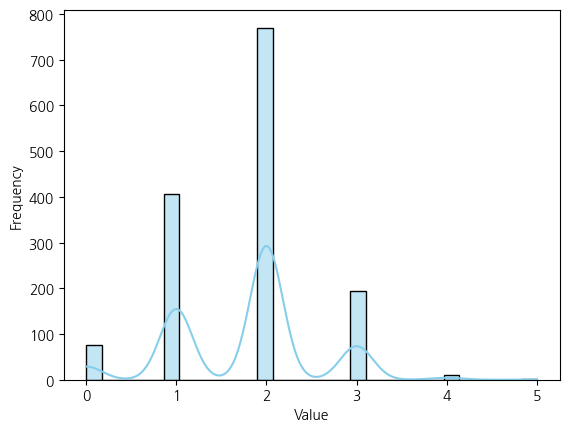

In [ ]:
# 히스토그램 시각화
sns.histplot(data=test, x='GarageCars', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

In [ ]:
#평균값 확인
mean_value = test['GarageCars'].mean()
print("test에서 평균값:", mean_value)

test에서 평균값: 1.7661179698216736


In [ ]:
#평균값으로 결측값 처리
test['GarageCars'].fillna(2, inplace=True)

7. GarageArea(차고의 크기(평방피트)) / 1개(test)

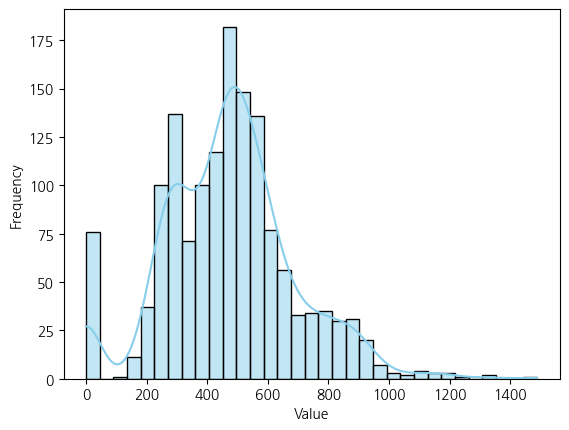

In [ ]:
# 히스토그램 시각화
sns.histplot(data=test, x='GarageArea', kde=True, color='skyblue')
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.show()  # 그래프 출력

In [ ]:
#.평균값 확인
mean_value = test['GarageArea'].mean()
print("test에서 평균값:", mean_value)

test에서 평균값: 472.76886145404666


In [ ]:
#평균값으로 결측값 처리
test['GarageArea'].fillna(472, inplace=True)

# **`< 2차 문자형 데이터 처리 >`**

~ 문자 평가 지표 ~
- Ex: 우수 (Excellent)
- Gd: 좋음 (Good)
- TA: 평균 (Average/Typical)
- Fa: 낮음 (Fair)
- Po: 떨어지는 (Poor)
- NA: 없음 (No)

1. FireplaceQu(벽난로품질) / 690개, 730개

In [ ]:
from collections import Counter

#데이터 개수 확인
string_counts = Counter(train['FireplaceQu'])
print(string_counts)

string_counts1 = Counter(test['FireplaceQu'])
print(string_counts1)

Counter({nan: 690, 'Gd': 380, 'TA': 313, 'Fa': 33, 'Ex': 24, 'Po': 20})
Counter({nan: 730, 'Gd': 364, 'TA': 279, 'Fa': 41, 'Po': 26, 'Ex': 19})


In [ ]:
# 최빈값으로 채우기
train['FireplaceQu'].fillna('NA', inplace=True)
test['FireplaceQu'].fillna('NA', inplace=True)

In [ ]:
# 범주형 변수를 더미 변수로 변환
dummy_df = pd.get_dummies(train['FireplaceQu'], prefix='FireplaceQu')

# 더미 변수와 숫자형 변수 합치기
merged_df = pd.concat([dummy_df, train['SalePrice']], axis=1)

# 상관관계 계산
merged_df.corr()

,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,SalePrice
FireplaceQu_Ex,1.000000,-0.019660,-0.076685,-0.122379,-0.015236,-0.067533,0.255239
FireplaceQu_Fa,-0.019660,1.000000,-0.090204,-0.143954,-0.017922,-0.079439,-0.026086
FireplaceQu_Gd,-0.076685,-0.090204,1.000000,-0.561512,-0.069906,-0.309863,0.339329
FireplaceQu_NA,-0.122379,-0.143954,-0.561512,1.000000,-0.111561,-0.494504,-0.471908
FireplaceQu_Po,-0.015236,-0.017922,-0.069906,-0.111561,1.000000,-0.061564,-0.075916
FireplaceQu_TA,-0.067533,-0.079439,-0.309863,-0.494504,-0.061564,1.000000,0.163147
SalePrice,0.255239,-0.026086,0.339329,-0.471908,-0.075916,0.163147,1.000000


벽난로의 품질은 상관관계가 거의 없지만 벽난로의 유무가 관련있음
*   Fireplaces의 상관계수와 NA의 상관계수 0.47로 동일
*   Fireplaces가 이미 벽난로 유무의 관계를 보여줌으로 FireplaceQu는 드롭하겠음

In [ ]:
train.drop(columns=['FireplaceQu'], inplace=True)
test.drop(columns=['FireplaceQu'], inplace=True)

2. BsmtQual(지하실 높이) / 37개,44개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['BsmtQual'])
print(string_counts)

string_counts1 = Counter(test['BsmtQual'])
print(string_counts1)

Counter({'TA': 649, 'Gd': 618, 'Ex': 121, nan: 37, 'Fa': 35})
Counter({'TA': 634, 'Gd': 591, 'Ex': 137, 'Fa': 53, nan: 44})


In [ ]:
#최빈값으로
train['BsmtQual'].fillna('TA', inplace=True)
test['BsmtQual'].fillna('TA', inplace=True)

3. BsmtCond(지하실의 일반상태) / 37개,45개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['BsmtCond'])
print(string_counts)

string_counts1 = Counter(test['BsmtCond'])
print(string_counts1)

Counter({'TA': 1311, 'Gd': 65, 'Fa': 45, nan: 37, 'Po': 2})
Counter({'TA': 1295, 'Fa': 59, 'Gd': 57, nan: 45, 'Po': 3})


In [ ]:
#최빈값으로
train['BsmtCond'].fillna('TA', inplace=True)
test['BsmtCond'].fillna('TA', inplace=True)

4. BsmtExposure(산책 또는 정원 수준 지하 벽) / 38개,44개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['BsmtExposure'])
print(string_counts)

string_counts1 = Counter(test['BsmtExposure'])
print(string_counts1)

Counter({'No': 953, 'Av': 221, 'Gd': 134, 'Mn': 114, nan: 38})
Counter({'No': 951, 'Av': 197, 'Gd': 142, 'Mn': 125, nan: 44})


In [ ]:
#최빈값으로
train['BsmtExposure'].fillna('No', inplace=True)
test['BsmtExposure'].fillna('No', inplace=True)

5. BsmtFinType1(지하 마감면적의 품질) / 37개,42개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['BsmtFinType1'])
print(string_counts)
string_counts1 = Counter(test['BsmtFinType1'])
print(string_counts1)

Counter({'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 148, 'Rec': 133, 'LwQ': 74, nan: 37})
Counter({'GLQ': 431, 'Unf': 421, 'ALQ': 209, 'Rec': 155, 'BLQ': 121, 'LwQ': 80, nan: 42})


In [ ]:
#최빈값으로
train['BsmtFinType1'].fillna('Unf', inplace=True)
test['BsmtFinType1'].fillna('Unf', inplace=True)

6. BsmtFinType2(두 번째 완성된 영역의 품질(있는 경우)) / 38개,42개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['BsmtFinType2'])
print(string_counts)

string_counts1 = Counter(test['BsmtFinType2'])
print(string_counts1)

Counter({'Unf': 1256, 'Rec': 54, 'LwQ': 46, nan: 38, 'BLQ': 33, 'ALQ': 19, 'GLQ': 14})
Counter({'Unf': 1237, 'Rec': 51, nan: 42, 'LwQ': 41, 'BLQ': 35, 'ALQ': 33, 'GLQ': 20})


In [ ]:
#최빈값으로
train['BsmtFinType2'].fillna('Unf', inplace=True)
test['BsmtFinType2'].fillna('Unf', inplace=True)

7. GarageType(차고 위치) / 81개,76개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['GarageType'])
print(string_counts)

string_counts1 = Counter(test['GarageType'])
print(string_counts1)

Counter({'Attchd': 870, 'Detchd': 387, 'BuiltIn': 88, nan: 81, 'Basment': 19, 'CarPort': 9, '2Types': 6})
Counter({'Attchd': 853, 'Detchd': 392, 'BuiltIn': 98, nan: 76, 'Basment': 17, '2Types': 17, 'CarPort': 6})


In [ ]:
#최빈값으로
train['GarageType'].fillna('Attchd', inplace=True)
test['GarageType'].fillna('Attchd', inplace=True)

8. GarageFinish(차고 내부 마감) / 81개,78개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['GarageFinish'])
print(string_counts)

string_counts1 = Counter(test['GarageFinish'])
print(string_counts1)

Counter({'Unf': 605, 'RFn': 422, 'Fin': 352, nan: 81})
Counter({'Unf': 625, 'RFn': 389, 'Fin': 367, nan: 78})


In [ ]:
#최빈값으로
train['GarageFinish'].fillna('Unf', inplace=True)
test['GarageFinish'].fillna('Unf', inplace=True)

9. GarageQual(차고 품질) / 81개,78개

In [ ]:
#데이터 개수 확인
string_counts = Counter(train['GarageQual'])
print(string_counts)

string_counts1 = Counter(test['GarageQual'])
print(string_counts1)

Counter({'TA': 1311, nan: 81, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3})
Counter({'TA': 1293, nan: 78, 'Fa': 76, 'Gd': 10, 'Po': 2})


In [ ]:
#최빈값으로
train['GarageQual'].fillna('TA', inplace=True)
test['GarageQual'].fillna('TA', inplace=True)

10. GarageCond(차고 상태) / 81개,78개


In [ ]:
#데이터 개수 확인
string_counts = Counter(train['GarageCond'])
print(string_counts)
string_counts1 = Counter(test['GarageCond'])
print(string_counts1)

Counter({'TA': 1326, nan: 81, 'Fa': 35, 'Gd': 9, 'Po': 7, 'Ex': 2})
Counter({'TA': 1328, nan: 78, 'Fa': 39, 'Po': 7, 'Gd': 6, 'Ex': 1})


In [ ]:
#최빈값으로
train['GarageCond'].fillna('TA', inplace=True)
test['GarageCond'].fillna('TA', inplace=True)

11. MasVnrType(조적 베니어 유형) / 8개


In [ ]:
#데이터 개수 확인
string_counts = Counter(train['MasVnrType'])
print(string_counts)

Counter({'None': 864, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15, nan: 8})


In [ ]:
#최빈값으로
train['MasVnrType'].fillna('None', inplace=True)

12. Electrical(전기 시스템) / 1개,1개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['Electrical'])
print(string_counts)
string_counts1 = Counter(train['Electrical'])
print(string_counts1)

Counter({'SBrkr': 1337, 'FuseA': 94, 'FuseF': 23, 'FuseP': 5})
Counter({'SBrkr': 1334, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1, nan: 1})


In [ ]:
#최빈값으로
train['Electrical'].fillna('SBrkr', inplace=True)
test['Electrical'].fillna('SBrkr', inplace=True)

13. MSZoning(일반적인 구역 분류) / 4개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['MSZoning'])
print(string_counts)

Counter({'RL': 1114, 'RM': 242, 'FV': 74, 'C (all)': 15, 'RH': 10, nan: 4})


In [ ]:
#최빈값으로
test['MSZoning'].fillna('RL', inplace=True)

14. Utilities(사용 가능한 유틸리티 종류) / 2개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['Utilities'])
print(string_counts)

Counter({'AllPub': 1457, nan: 2})


In [ ]:
#최빈값으로
test['Utilities'].fillna('AllPub', inplace=True)

15. Exterior1st(주택 외부 피복재) / 1개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['Exterior1st'])
print(string_counts)

Counter({'VinylSd': 510, 'MetalSd': 230, 'HdBoard': 220, 'Wd Sdng': 205, 'Plywood': 113, 'CemntBd': 65, 'BrkFace': 37, 'WdShing': 30, 'AsbShng': 24, 'Stucco': 18, 'BrkComm': 4, 'AsphShn': 1, nan: 1, 'CBlock': 1})


In [ ]:
#최빈값으로
test['Exterior1st'].fillna('VinylSd', inplace=True)

16. Exterior2nd(집의 외부 덮개(재료가 두 개 이상인 경우)) / 1개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['Exterior2nd'])
print(string_counts)

Counter({'VinylSd': 510, 'MetalSd': 233, 'HdBoard': 199, 'Wd Sdng': 194, 'Plywood': 128, 'CmentBd': 66, 'Wd Shng': 43, 'BrkFace': 22, 'Stucco': 21, 'AsbShng': 18, 'Brk Cmn': 15, 'ImStucc': 5, 'CBlock': 2, 'AsphShn': 1, nan: 1, 'Stone': 1})


In [ ]:
#최빈값으로
test['Exterior2nd'].fillna('VinylSd', inplace=True)

17. MasVnrType (조적 베니어 유형) / 16개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['MasVnrType'])
print(string_counts)

Counter({'None': 878, 'BrkFace': 434, 'Stone': 121, nan: 16, 'BrkCmn': 10})


In [ ]:
#최빈값으로
test['MasVnrType'].fillna('None', inplace=True)

18. KitchenQual (주방 품질) / 1개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['KitchenQual'])
print(string_counts)

Counter({'TA': 757, 'Gd': 565, 'Ex': 105, 'Fa': 31, nan: 1})


In [ ]:
#최빈값으로
test['KitchenQual'].fillna('TA', inplace=True)

19. Functional (홈 기능성 평가) / 2개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['Functional'])
print(string_counts)

Counter({'Typ': 1357, 'Min2': 36, 'Min1': 34, 'Mod': 20, 'Maj1': 5, 'Maj2': 4, nan: 2, 'Sev': 1})


In [ ]:
#최빈값으로
test['Functional'].fillna('Typ', inplace=True)

20. SaleType (판매 유형) / 1개


In [ ]:
#데이터 개수 확인
string_counts = Counter(test['SaleType'])
print(string_counts)

Counter({'WD': 1258, 'New': 117, 'COD': 44, 'ConLD': 17, 'CWD': 8, 'Oth': 4, 'ConLI': 4, 'Con': 3, 'ConLw': 3, nan: 1})


In [ ]:
#최빈값으로
test['SaleType'].fillna('WD', inplace=True)

# < 2차 데이터 상관계수 확인 후 정리 >

1. 결측값 처리한 숫자형 변수들

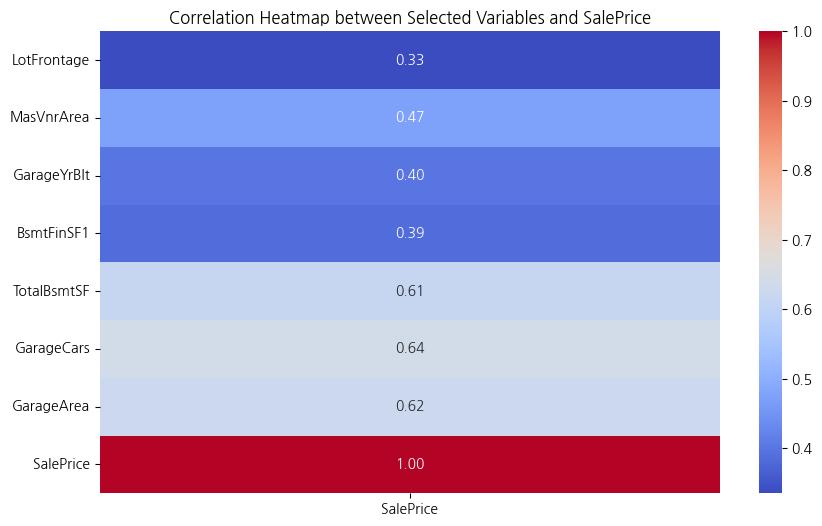

In [ ]:
# 선택할 열들
selected_columns = ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','TotalBsmtSF','GarageCars','GarageArea']

# 선택한 열들과 SalePrice만 포함한 데이터프레임 생성
selected_df = train[selected_columns + ['SalePrice']]

# 목표변수인 SalePrice와의 상관관계 계산
correlation_matrix = selected_df.corr()

# SalePrice와의 상관관계 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Selected Variables and SalePrice')
plt.show()

ㄴ 0.3 미만이 없어서 모두 유지

2. 결측값 처리한 문자형 변수들

In [ ]:
# 변수가 모두 출력되도록 max_rows 설정 변경
pd.set_option('display.max_rows', None)

# 선택할 변수들
categorical_vars = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'MasVnrType', 'Electrical', 'MSZoning',
                    'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'KitchenQual', 'Functional', 'SaleType', 'SalePrice']

# 선택한 변수들로 데이터프레임 재구성
selected_df = train[categorical_vars]

# 범주형 변수를 더미 변수로 변환
dummy_df = pd.get_dummies(selected_df, drop_first=True)  # drop_first=True로 첫 번째 범주를 제거하여 다중공선성 문제 방지

# 목표변수인 SalePrice와의 상관관계 계산
correlation = dummy_df.corr()['SalePrice'].sort_values(ascending=False)

# 상관관계표 출력
print(correlation.sort_index())

BsmtCond_Gd            0.088824
BsmtCond_Po           -0.054529
BsmtCond_TA            0.024945
BsmtExposure_Gd        0.307298
BsmtExposure_Mn        0.043493
BsmtExposure_No       -0.319990
BsmtFinType1_BLQ      -0.132914
BsmtFinType1_GLQ       0.434597
BsmtFinType1_LwQ      -0.084577
BsmtFinType1_Rec      -0.135667
BsmtFinType1_Unf      -0.133001
BsmtFinType2_BLQ      -0.057102
BsmtFinType2_GLQ       0.000076
BsmtFinType2_LwQ      -0.037604
BsmtFinType2_Rec      -0.039494
BsmtFinType2_Unf       0.055905
BsmtQual_Fa           -0.128725
BsmtQual_Gd            0.234822
BsmtQual_TA           -0.498545
Electrical_FuseF      -0.126601
Electrical_FuseP      -0.047761
Electrical_Mix        -0.037555
Electrical_SBrkr       0.242357
Exterior1st_AsphShn   -0.026677
Exterior1st_BrkComm   -0.051264
Exterior1st_BrkFace    0.032371
Exterior1st_CBlock    -0.025028
Exterior1st_CemntBd    0.133492
Exterior1st_HdBoard   -0.095148
Exterior1st_ImStucc    0.026729
Exterior1st_MetalSd   -0.167068
Exterior

상관계수의 평균이 0.3미만인 변수들 드롭

In [ ]:
train.drop(columns=['BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtQual','Electrical','Exterior1st','Exterior2nd','Functional','GarageCond','GarageQual','GarageType','MSZoning','MasVnrType','SaleType','Utilities'
], inplace=True)
test.drop(columns=['BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtQual','Electrical','Exterior1st','Exterior2nd','Functional','GarageCond','GarageQual','GarageType','MSZoning','MasVnrType','SaleType','Utilities'
], inplace=True)

# <최종 데이터프레임>


In [ ]:
train.info()
#41개 변수, 결측값 모두 채움

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  RoofMatl       1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [ ]:
test.info()
#40개, 결측값 모두 채움

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   Street         1459 non-null   object 
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   LotConfig      1459 non-null   object 
 6   LandSlope      1459 non-null   object 
 7   Neighborhood   1459 non-null   object 
 8   Condition1     1459 non-null   object 
 9   Condition2     1459 non-null   object 
 10  BldgType       1459 non-null   object 
 11  HouseStyle     1459 non-null   object 
 12  OverallQual    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  YearRemodAdd   1459 non-null   int64  
 15  RoofStyle      1459 non-null   object 
 16  RoofMatl       1459 non-null   object 
 17  MasVnrArea     1459 non-null   float64
 18  ExterQua

# <인코딩>

In [ ]:
# 범주형 변수들의 리스트 추출
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
print("범주형 변수들:", categorical_features)

범주형 변수들: ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'SaleCondition']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 원핫 인코딩을 수행할 변수를 지정하고 변환
encoded_data = encoder.fit_transform(train[['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'SaleCondition']])

# 변환된 데이터를 데이터프레임으로 변환하여 확인
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'SaleCondition']))

In [ ]:
# 원핫 인코딩된 데이터프레임과 원래 데이터프레임을 합치기
combined_df = pd.concat([train, encoded_df], axis=1)

# < 모델링 >

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수들의 리스트 추출
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
print("범주형 변수들:", categorical_features)

# LabelEncoder 객체 생성 및 적용
label_encoder = LabelEncoder()
train[categorical_features] = train[categorical_features].apply(label_encoder.fit_transform)

# 타겟 변수와 특성 분리
X = train.drop('SalePrice', axis=1)  # 타겟 변수를 제외한 모든 열을 특성으로 사용
y = train['SalePrice']

# 훈련 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 그레이디언트 부스팅 모델 정의
gb = GradientBoostingRegressor()

# 탐색할 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 결정 트리 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드에 필요한 최소 샘플 수
}

# 랜덤 서치 객체 생성
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# 모델 훈련
gb_random.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", gb_random.best_params_)

# 최적의 모델 선택
best_gb = gb_random.best_estimator_

# 검증 데이터로 예측
y_pred = best_gb.predict(X_val)

# 평가 지표 계산 (RMSE 및 적합도)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)


범주형 변수들: ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'SaleCondition']
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
RMSE: 27834.884190972058
R-squared: 0.8989898529740686


In [ ]:
# 범주형 변수들에 대해 LabelEncoder 적용
for feature in categorical_features:
    test[feature] = label_encoder.transform(test[feature])

# 테스트 데이터로 예측
test_predictions = best_gb.predict(test)

# 테스트 예측 결과 DataFrame 생성
submission = pd.DataFrame({'ID': range(1461, 1461+len(test_predictions)), 'SalePrice': test_predictions})

# CSV 파일로 저장
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()

,ID,SalePrice
0,1,129338.054457
1,2,160383.379574
2,3,180902.477900
3,4,191614.649609
4,5,204748.712723
